# RNA Microarray Machine Learning

- Data source is from UCI Machine Learning Repo [https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq]
- The dataset is a collection gene expressions of patients having different types of tumor: BRCA(breast), KIRC(kidney), COAD(colon), LUAD(lung) and PRAD(prostate).


## Import Data and Exploration
The datast contains 801 instances and 20531 features. It is a high dimensional low sample size dataset with multiple classes. First step of the project is importing the dataset and perform some explorations of the dataset to gain some basic understanding. In terms of visualizations, it is difficult to visualize because of high dimensions. t -Distributed Stochastic Neighbor Embedding or t-SNE is a technique that I used to perform dimension reduction to visualize the data in 2D.




  Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0   sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0   
1   sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0   
2   sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0   
3   sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0   
4   sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0   

     gene_6    gene_7  gene_8     ...      gene_20521  gene_20522  gene_20523  \
0  7.175175  0.591871     0.0     ...        4.926711    8.210257    9.723516   
1  6.816049  0.000000     0.0     ...        4.593372    7.323865    9.740931   
2  6.972130  0.452595     0.0     ...        5.125213    8.127123   10.908640   
3  7.843375  0.434882     0.0     ...        6.076566    8.792959   10.141520   
4  6.566967  0.360982     0.0     ...        5.996032    8.891425   10.373790   

   gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529 

<function matplotlib.pyplot.close>

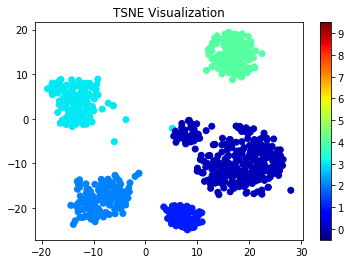

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os.path
import numpy as np
from numpy import genfromtxt
import time
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# load the dataset
X = pd.read_csv("data/RNA_data/data.csv")
Y = pd.read_csv("data/RNA_data/labels.csv")

# basic overview of data dimension
print(X.head())
print(Y.head())

# convert dataframe into a numpy array
X = X.dropna()
# drop the first column which only contains strings
X = X.drop(X.columns[X.columns.str.contains('unnamed', case=False)], axis=1)
print("\n\nThe shape of dataset:")
print(X.shape)
print(Y.shape)

# label encode the multiple class string into integer values
Y = Y.drop(Y.columns[0], axis=1)
Y = Y.apply(LabelEncoder().fit_transform)

# use TSNE to visualize the high dimension data in 2D
t0 = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=100)
tsne_results = tsne.fit_transform(X)
t1 = time.time()
print("TSNE took at %.2f seconds" % (t1 - t0))

# visualize TSNE
x_axis = tsne_results[:,0]
y_axis = tsne_results[:,1]
plt.scatter(x_axis, y_axis, c=Y, cmap=plt.cm.get_cmap("jet", 100))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.title("TSNE Visualization")
plt.show
plt.close

**The TSNE algorithm is a dimension reduction algorithm that allows us to visualize high dimensional data in 2D. We see that dataset form five clusters, which correlates with the five different tumor types.**

## Split Dataset into Train and Test



In [ ]:
# split data into training and testing set
X_train, X_test, Y_train, Y_test \
    = train_test_split(X, Y, test_size=0.40, random_state=100)

# save the train and test csv files
X_train.to_csv("data/X_train.csv")
X_test.to_csv("data/X_test.csv")
Y_train.to_csv("data/Y_train.csv")
Y_test.to_csv("data/Y_test.csv")